In [3]:
import pandas as pd
from openpyxl import load_workbook
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv ('mahasiswa.csv')
df

,No,NIM,Nama,Jumlah SKS,Nilai TBQ
0,1,1300018177,Ani Yuanita,109,70
1,2,1300018188,Burhan Fajar P.,89,75
2,3,1300018200,Heri Budiyanto,120,65
3,4,1300018201,Dimas Satrio W.,111,60
4,5,1300019200,Nur Hidayat,100,50
5,6,1300019181,Vilda Lestari,90,55
6,7,1300018198,Edi Suryanto,98,60
7,8,1300019001,Erna Dwi Puspita,70,75
8,9,1300022099,Nurfita FF,63,80
9,10,1300015006,Fahmi dwi N.,84,60


In [5]:
df.columns =['No', 'NIM', 'Nama', 'Jumlah_SKS', 'Nilai_TBQ']
df

,No,NIM,Nama,Jumlah_SKS,Nilai_TBQ
0,1,1300018177,Ani Yuanita,109,70
1,2,1300018188,Burhan Fajar P.,89,75
2,3,1300018200,Heri Budiyanto,120,65
3,4,1300018201,Dimas Satrio W.,111,60
4,5,1300019200,Nur Hidayat,100,50
5,6,1300019181,Vilda Lestari,90,55
6,7,1300018198,Edi Suryanto,98,60
7,8,1300019001,Erna Dwi Puspita,70,75
8,9,1300022099,Nurfita FF,63,80
9,10,1300015006,Fahmi dwi N.,84,60


In [6]:
df.isna().sum()

No            0
NIM           0
Nama          0
Jumlah_SKS    0
Nilai_TBQ     0
dtype: int64

In [7]:
for index, row in df.iterrows():
    if row['Jumlah_SKS'] > 110:
        df.loc[index, 'Status_KKN'] = 'Boleh'
    else:
        df.loc[index, 'Status_KKN'] = 'Tidak Boleh'
df[['NIM', 'Jumlah_SKS', 'Status_KKN']]

,NIM,Jumlah_SKS,Status_KKN
0,1300018177,109,Tidak Boleh
1,1300018188,89,Tidak Boleh
2,1300018200,120,Boleh
3,1300018201,111,Boleh
4,1300019200,100,Tidak Boleh
5,1300019181,90,Tidak Boleh
6,1300018198,98,Tidak Boleh
7,1300019001,70,Tidak Boleh
8,1300022099,63,Tidak Boleh
9,1300015006,84,Tidak Boleh


In [8]:
for index, row in df.iterrows():
    if row['Nilai_TBQ'] > 75:
        df.loc[index, 'Status_TBQ'] = 'Lulus'
    else:
        df.loc[index, 'Status_TBQ'] = 'Tidak Lulus'
df[['NIM', 'Nilai_TBQ', 'Status_TBQ']]

,NIM,Nilai_TBQ,Status_TBQ
0,1300018177,70,Tidak Lulus
1,1300018188,75,Tidak Lulus
2,1300018200,65,Tidak Lulus
3,1300018201,60,Tidak Lulus
4,1300019200,50,Tidak Lulus
5,1300019181,55,Tidak Lulus
6,1300018198,60,Tidak Lulus
7,1300019001,75,Tidak Lulus
8,1300022099,80,Lulus
9,1300015006,60,Tidak Lulus


In [9]:
df[['NIM', 'Jumlah_SKS', 'Status_KKN', 'Nilai_TBQ', 'Status_TBQ']]

,NIM,Jumlah_SKS,Status_KKN,Nilai_TBQ,Status_TBQ
0,1300018177,109,Tidak Boleh,70,Tidak Lulus
1,1300018188,89,Tidak Boleh,75,Tidak Lulus
2,1300018200,120,Boleh,65,Tidak Lulus
3,1300018201,111,Boleh,60,Tidak Lulus
4,1300019200,100,Tidak Boleh,50,Tidak Lulus
5,1300019181,90,Tidak Boleh,55,Tidak Lulus
6,1300018198,98,Tidak Boleh,60,Tidak Lulus
7,1300019001,70,Tidak Boleh,75,Tidak Lulus
8,1300022099,63,Tidak Boleh,80,Lulus
9,1300015006,84,Tidak Boleh,60,Tidak Lulus


In [10]:
tabel = df.reset_index(drop = True)
tabel

,No,NIM,Nama,Jumlah_SKS,Nilai_TBQ,Status_KKN,Status_TBQ
0,1,1300018177,Ani Yuanita,109,70,Tidak Boleh,Tidak Lulus
1,2,1300018188,Burhan Fajar P.,89,75,Tidak Boleh,Tidak Lulus
2,3,1300018200,Heri Budiyanto,120,65,Boleh,Tidak Lulus
3,4,1300018201,Dimas Satrio W.,111,60,Boleh,Tidak Lulus
4,5,1300019200,Nur Hidayat,100,50,Tidak Boleh,Tidak Lulus
5,6,1300019181,Vilda Lestari,90,55,Tidak Boleh,Tidak Lulus
6,7,1300018198,Edi Suryanto,98,60,Tidak Boleh,Tidak Lulus
7,8,1300019001,Erna Dwi Puspita,70,75,Tidak Boleh,Tidak Lulus
8,9,1300022099,Nurfita FF,63,80,Tidak Boleh,Lulus
9,10,1300015006,Fahmi dwi N.,84,60,Tidak Boleh,Tidak Lulus


In [11]:
x = tabel[['Jumlah_SKS', 'Nilai_TBQ']].values
print(x)

[[109  70]
 [ 89  75]
 [120  65]
 [111  60]
 [100  50]
 [ 90  55]
 [ 98  60]
 [ 70  75]
 [ 63  80]
 [ 84  60]
 [102  68]
 [110  70]
 [110  75]
 [124  68]
 [120  65]
 [115  68]
 [116  80]
 [ 98  70]
 [110  75]
 [114  55]
 [120  68]
 [118  50]
 [105  55]
 [109  68]
 [108  70]
 [ 79  75]
 [ 67  55]
 [130  58]
 [107  80]
 [108  85]]


coordinate 0  [109  70] labels 0
coordinate 1  [89 75] labels 1
coordinate 2  [120  65] labels 0
coordinate 3  [111  60] labels 0
coordinate 4  [100  50] labels 0
coordinate 5  [90 55] labels 1
coordinate 6  [98 60] labels 0
coordinate 7  [70 75] labels 1
coordinate 8  [63 80] labels 1
coordinate 9  [84 60] labels 1
coordinate 10  [102  68] labels 0
coordinate 11  [110  70] labels 0
coordinate 12  [110  75] labels 0
coordinate 13  [124  68] labels 0
coordinate 14  [120  65] labels 0
coordinate 15  [115  68] labels 0
coordinate 16  [116  80] labels 0
coordinate 17  [98 70] labels 0
coordinate 18  [110  75] labels 0
coordinate 19  [114  55] labels 0
coordinate 20  [120  68] labels 0
coordinate 21  [118  50] labels 0
coordinate 22  [105  55] labels 0
coordinate 23  [109  68] labels 0
coordinate 24  [108  70] labels 0
coordinate 25  [79 75] labels 1
coordinate 26  [67 55] labels 1
coordinate 27  [130  58] labels 0
coordinate 28  [107  80] labels 0
coordinate 29  [108  85] labels 0


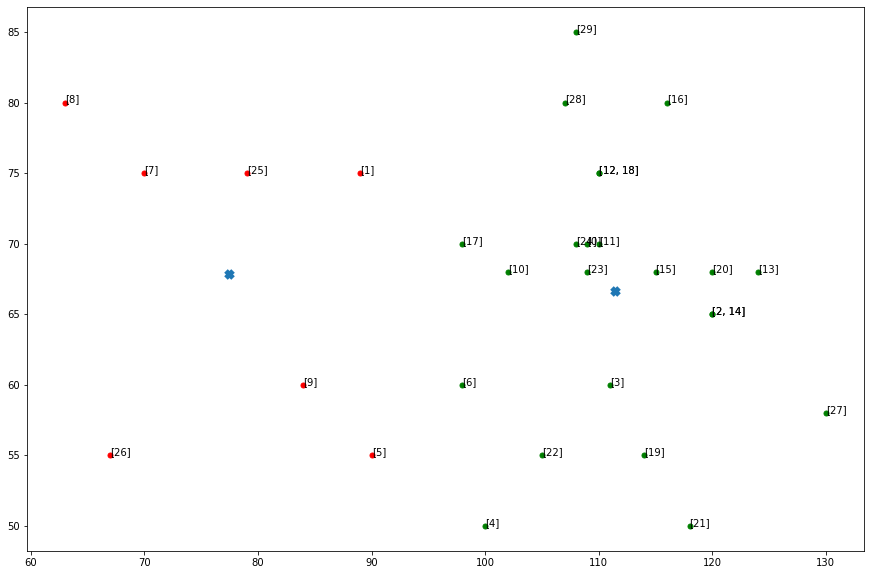

In [36]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(x)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_
colors = ['g.', 'r.', 'b.']

plt.figure(figsize = (15,10))

for i in range(len(x)):
    print ('coordinate %s '%i, x[i], 'labels %s' %labels[i])
    plt.plot(x[i][0], x[i][1], colors[labels[i]], markersize=10)
    list_cluster = tabel[(tabel['Jumlah_SKS'] == x[i][0]) & (tabel['Nilai_TBQ'] == x[i][1])].index.tolist()
    plt.text(x[i][0], x[i][1], '%s' %(list_cluster))
plt.scatter(centroids[: , 0], centroids[: , 1], marker = 'x', s = 50, linewidths = 5, zorder = 10)
plt.show()

In [37]:
from __future__ import print_function
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np

print(__doc__)

def silhoutte_test(X, range_n_clusters):
    for n_clusters in range_n_clusters:
# Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)
    
# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    
# Initialize the clusterer with n_clusters value and a random generator
# seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)
    
# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters, 
              "The average silhouette_score is :", silhouette_avg)
# Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)
    
        y_lower = 10
        for i in range(n_clusters):
# Aggregate the silhouette scores for samples belonging to
# cluster i, and sort them
            ith_cluster_silhouette_values =                 sample_silhouette_values[cluster_labels == i]
    
            ith_cluster_silhouette_values.sort()
        
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)
# Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
# Compute the new y_lower for next plot
            y_lower = y_upper + 10 # 10 for the 0 samples
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
# The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([]) # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
# 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,c=colors)
# Labeling the clusters
    centers = clusterer.cluster_centers_
# Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],marker='o', c="white", alpha=1, s=200)
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)
        
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

Automatically created module for IPython interactive environment


For n_clusters = 2 The average silhouette_score is : 0.5206142070975137
For n_clusters = 3 The average silhouette_score is : 0.3502695652257052
For n_clusters = 4 The average silhouette_score is : 0.36954245271214603
For n_clusters = 5 The average silhouette_score is : 0.35634326917981873
For n_clusters = 6 The average silhouette_score is : 0.3725074590832802
For n_clusters = 7 The average silhouette_score is : 0.3644716091893043
For n_clusters = 8 The average silhouette_score is : 0.3724495587889706


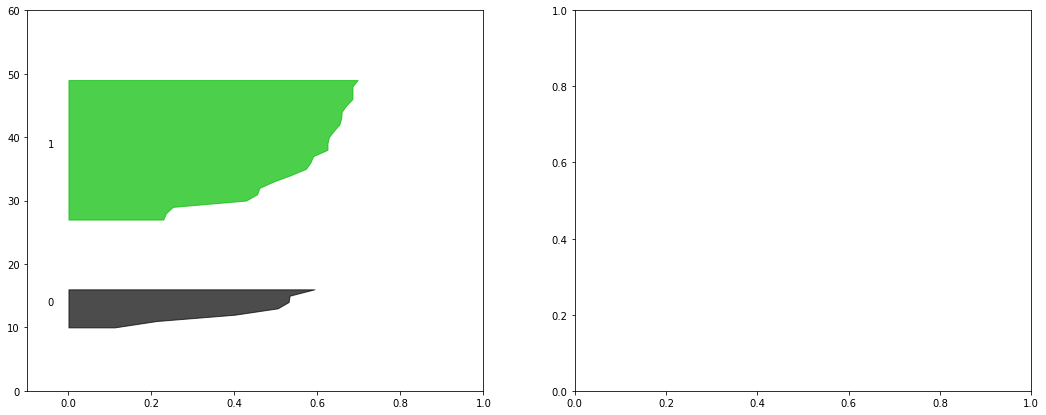

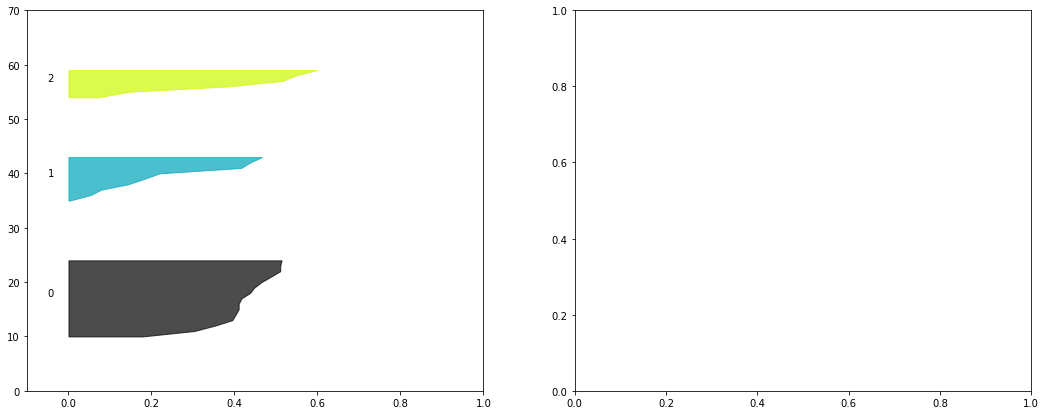

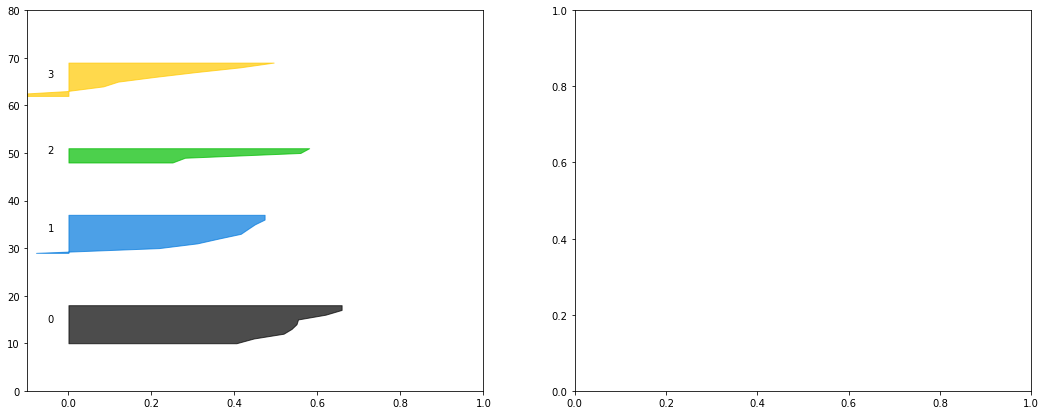

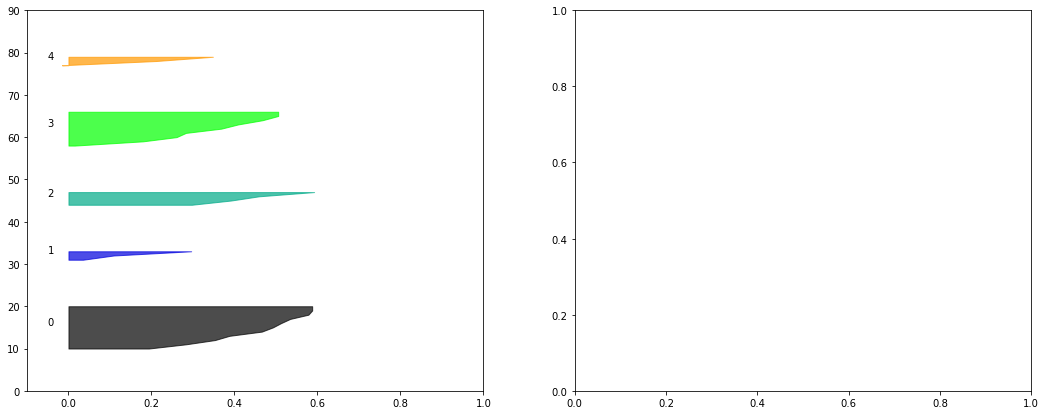

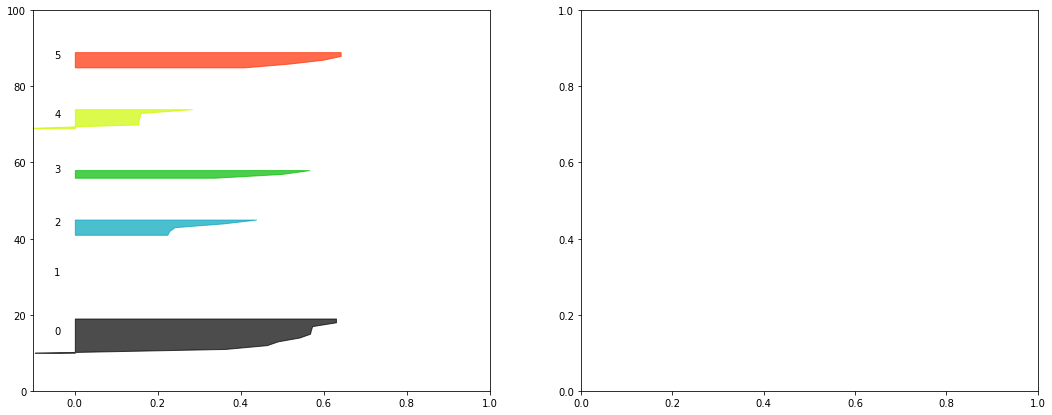

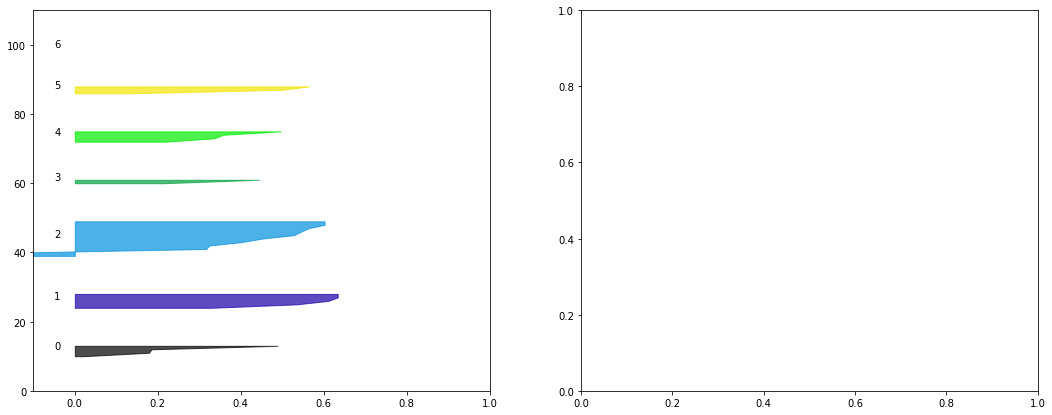

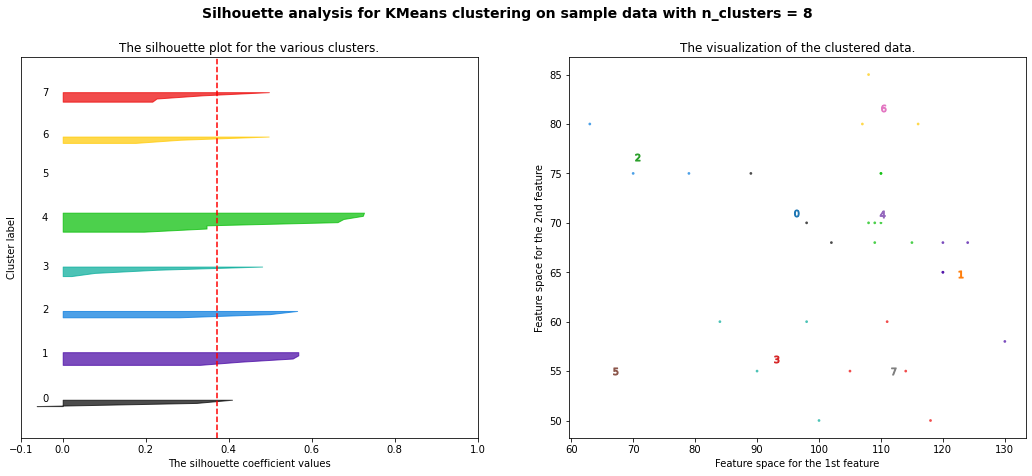

In [38]:
range_clusters = [2,3,4,5,6,7,8]
silhoutte_test(x, range_clusters)

In [39]:
import numpy as np
def purity_score (cluster, classes):
    A = np.c_[(cluster, classes)]
    n_accurate = 0.
    for j in np.unique(A[:,0]):
        z=A[A[:,0]==j, 1]
        x=np.argmax(np.max(z))
        n_accurate += len(z[z==x])
    return n_accurate/A.shape[0]

In [46]:
classes = [0,0,2,1,2,2,2,1,1,1,2,0,1,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,2,2]
print('clusters : %s' %labels)
print('clusters : %s' %np.array(classes))

clusters : [0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0]
clusters : [0 0 2 1 2 2 2 1 1 1 2 0 1 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 2 2]


In [47]:
purity_score(labels, classes)

0.5333333333333333